# Deep Learning for Image Classification, Part 3
Easily viewed in [Google Colab](https://colab.research.google.com/drive/15CU6b_pbAHsRYAsAMBw3dZ2Jh85fe0Fj?usp=sharing). 

### Imports

In [29]:
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf

### Read the selected MedMNIST data set into a `python dictionary` 


Link to dataset description<br>
https://www.cell.com/cell/fulltext/S0092-8674(18)30154-5?_returnURL=https%3A%2F%2Flinkinghub.elsevier.com%2Fretrieve%2Fpii%2FS0092867418301545%3Fshowall%3Dtrue

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
%cd /content/drive/MyDrive/Colab Notebooks/Make School Winter 2021 Intensive
%ls

/content/drive/MyDrive/Colab Notebooks/Make School Winter 2021 Intensive
 DeepLearning3.ipynb                                        octmnist.npz
"Laine's copy of fashion_MNIST_classification_jcat.ipynb"


In [32]:
MedMNIST = np.load("octmnist.npz")

In [36]:
print(MedMNIST)

In [37]:
MedMNIST.files

['train_images',
 'val_images',
 'test_images',
 'train_labels',
 'val_labels',
 'test_labels']

### Extract Data

In [33]:
train_labels = MedMNIST['train_labels'].squeeze()
train_images = MedMNIST['train_images']

val_labels = MedMNIST['val_labels'].squeeze()
val_images = MedMNIST['val_images']

test_labels = MedMNIST['test_labels'].squeeze()
test_images = MedMNIST['test_images']

### Check for correct format

In [39]:
print(train_labels.shape)
print(train_images.shape)

(97477,)
(97477, 28, 28)


In [40]:
print(val_labels.shape)
print(val_images.shape)

(10832,)
(10832, 28, 28)


In [41]:
print(test_labels.shape)
print(test_images.shape)

(1000,)
(1000, 28, 28)


## Build and Test a Classifier
### Preprocess the Data

In [42]:
print(train_labels[0:10])

[0 3 3 3 0 3 1 0 3 3]


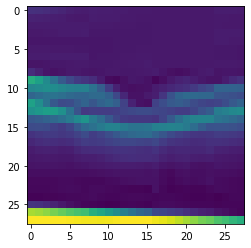

In [43]:
plt.figure()
plt.imshow(train_images[50000])

plt.grid(False)
plt.show()

### Scale values to a range of 0 to 1

In [34]:
train_images = train_images / 255.0
val_images = val_images / 255.0
test_images = test_images / 255.0

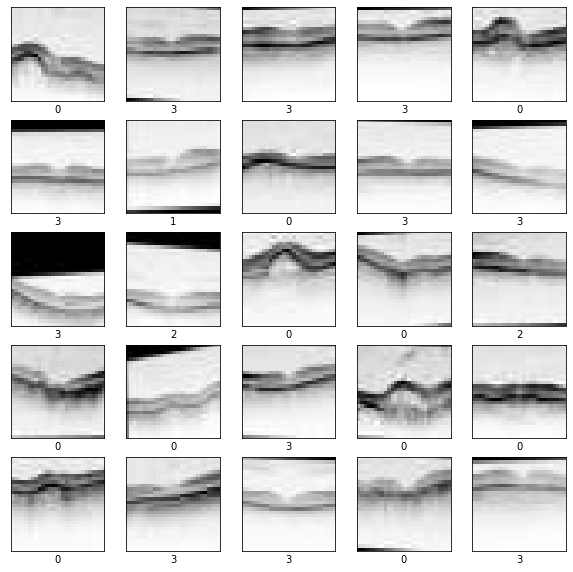

In [35]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

### Set up layers

In [82]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4)  # changed from 10 to 4 after the evaluation made in the next cell
])

In [48]:
unique_labels = set(train_labels)
print(unique_labels)

{0, 1, 2, 3}


### Compile the Model

In [83]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train the Model

In [84]:
model.fit(train_images, train_labels, epochs=4)

Epoch 1/4
3047/3047 [==============================] - 6s 2ms/step - loss: 1.0230 - accuracy: 0.5929
Epoch 2/4
3047/3047 [==============================] - 5s 2ms/step - loss: 0.8453 - accuracy: 0.6842
Epoch 3/4
3047/3047 [==============================] - 5s 2ms/step - loss: 0.7526 - accuracy: 0.7262
Epoch 4/4
3047/3047 [==============================] - 5s 2ms/step - loss: 0.6933 - accuracy: 0.7494


In [85]:
val_loss, val_acc = model.evaluate(val_images, val_labels, verbose=2)

339/339 - 0s - loss: 0.6508 - accuracy: 0.7695


## Experiments to Improve the Model
<ul>
<li>Increase Nodes</li>
<li>Decrease Nodes</li>
<li>Add a layer</li>
<li>Add another layer</li>
<li>Position Nodes as decreasing through multiple layers</li>
<li>Position Nodes as increasing through multiple layers</li>
</ul>

### Add a layer

In [36]:
two_layer_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(4)
])


In [37]:
two_layer_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [38]:
two_layer_model.fit(train_images, train_labels, epochs=4)

Epoch 1/4
3047/3047 [==============================] - 8s 3ms/step - loss: 1.0089 - accuracy: 0.5950
Epoch 2/4
3047/3047 [==============================] - 11s 4ms/step - loss: 0.8210 - accuracy: 0.6934
Epoch 3/4
3047/3047 [==============================] - 7s 2ms/step - loss: 0.7234 - accuracy: 0.7350
Epoch 4/4
3047/3047 [==============================] - 7s 2ms/step - loss: 0.6681 - accuracy: 0.7574


In [39]:
val_loss, val_acc = two_layer_model.evaluate(val_images, val_labels, verbose=2)

339/339 - 0s - loss: 0.7203 - accuracy: 0.7388


<font color="red">
Adding a layer decreased the loss from 0.6830 to 0.6258 and increased the accuracy from 0.7542 to 0.7779 , and therefore appears to be <strong>benificial</strong>
</font>

### Add Another Layer

In [60]:
three_layer_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(4)
])

In [61]:
three_layer_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [81]:
three_layer_model.fit(train_images, train_labels, epochs=4)

Epoch 1/4
3047/3047 [==============================] - 7s 2ms/step - loss: 0.5481 - accuracy: 0.8009
Epoch 2/4
3047/3047 [==============================] - 7s 2ms/step - loss: 0.5373 - accuracy: 0.8063
Epoch 3/4
3047/3047 [==============================] - 7s 2ms/step - loss: 0.5263 - accuracy: 0.8094
Epoch 4/4
3047/3047 [==============================] - 7s 2ms/step - loss: 0.5172 - accuracy: 0.8117


In [63]:
val_loss, val_acc = three_layer_model.evaluate(val_images, val_labels, verbose=2)

339/339 - 0s - loss: 0.6334 - accuracy: 0.7682


<font color="red">
Adding a third layer appears to be <strong>detrimental</strong>. Loss increased from 0.6258 for the two layer model, to 0.6334 and Accuracy decreased from 0.7708 for the two layer model, to 0.7682 .
</font>

### Increase the Nodes

In [65]:
increased_nodes_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(4)
])

In [66]:
increased_nodes_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [68]:
increased_nodes_model.fit(train_images, train_labels, epochs=4)

Epoch 1/4
3047/3047 [==============================] - 8s 2ms/step - loss: 1.0110 - accuracy: 0.5971
Epoch 2/4
3047/3047 [==============================] - 7s 2ms/step - loss: 0.8060 - accuracy: 0.7024
Epoch 3/4
3047/3047 [==============================] - 7s 2ms/step - loss: 0.7128 - accuracy: 0.7411
Epoch 4/4
3047/3047 [==============================] - 7s 2ms/step - loss: 0.6691 - accuracy: 0.7577


In [87]:
print("Original model with nodes at 128:")
val_loss, val_acc = model.evaluate(val_images, val_labels, verbose=2)
print("Nodes increased to 256:")
val_loss, val_acc = increased_nodes_model.evaluate(val_images, val_labels, verbose=2)

Original model with nodes at 128:
339/339 - 0s - loss: 0.6508 - accuracy: 0.7695
Nodes increased to 256:
339/339 - 0s - loss: 0.6606 - accuracy: 0.7614


<font color="red">
Increasing the number of nodes appears to be <strong>detrimental</strong>. Loss increased from 0.6508 in the original model to 0.6606 and Accuracy decreased from 0.7695 to 0.7614 .
</font>

### Doubly increase the nodes


In [70]:
doubly_increased_nodes_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4)
])

In [71]:
doubly_increased_nodes_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [72]:
doubly_increased_nodes_model.fit(train_images, train_labels, epochs=4)

Epoch 1/4
3047/3047 [==============================] - 7s 2ms/step - loss: 1.0190 - accuracy: 0.5960
Epoch 2/4
3047/3047 [==============================] - 7s 2ms/step - loss: 0.8126 - accuracy: 0.6968
Epoch 3/4
3047/3047 [==============================] - 7s 2ms/step - loss: 0.7179 - accuracy: 0.7393
Epoch 4/4
3047/3047 [==============================] - 7s 2ms/step - loss: 0.6697 - accuracy: 0.7580


In [86]:
print("Original model with nodes at 128:")
val_loss, val_acc = model.evaluate(val_images, val_labels, verbose=2)
print("Nodes increased to 256:")
val_loss, val_acc = increased_nodes_model.evaluate(val_images, val_labels, verbose=2)
print("Nodes increased to 512:")
val_loss, val_acc = doubly_increased_nodes_model.evaluate(val_images, val_labels, verbose=2)

Original model with nodes at 128:
339/339 - 0s - loss: 0.6508 - accuracy: 0.7695
Nodes increased to 256:
339/339 - 0s - loss: 0.6606 - accuracy: 0.7614
Nodes increased to 512:
339/339 - 0s - loss: 0.6725 - accuracy: 0.7569


<font color="red">
<u><strong>Conclusion</u></strong>:<br>
Doubly increasing the nodes to 512 appears to also be <strong>detrimental</strong> in comparison to increasing them to 256. It does not decrease the loss or increase the accuracy in comparison to the model with 256 nodes.</font>

### Decrease the Nodes

In [88]:
decreased_nodes_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4)
])

In [89]:
decreased_nodes_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [90]:
decreased_nodes_model.fit(train_images, train_labels, epochs=4)

Epoch 1/4
3047/3047 [==============================] - 5s 1ms/step - loss: 1.0490 - accuracy: 0.5747
Epoch 2/4
3047/3047 [==============================] - 4s 1ms/step - loss: 0.8788 - accuracy: 0.6709
Epoch 3/4
3047/3047 [==============================] - 4s 1ms/step - loss: 0.8076 - accuracy: 0.6996
Epoch 4/4
3047/3047 [==============================] - 4s 1ms/step - loss: 0.7579 - accuracy: 0.7249


In [91]:
print("Original model with nodes at 128:")
val_loss, val_acc = model.evaluate(val_images, val_labels, verbose=2)
print("Nodes decreased to 64:")
val_loss, val_acc = decreased_nodes_model.evaluate(val_images, val_labels, verbose=2)

Original model with nodes at 128:
339/339 - 0s - loss: 0.6508 - accuracy: 0.7695
Nodes decreased to 64:
339/339 - 0s - loss: 0.7163 - accuracy: 0.7391


<font color="red">
<u><strong>Conclusion</u></strong>:<br>
Decreasing the nodes is <strong>detrimental</strong> because it increases the loss and decreases the accuracy. <strong>128</strong> is the ideal number of nodes on which to model this dataset, when using a single layer.
</font>

### Double layers with decreasing nodes

In [17]:
two_layer_decreasing_nodes_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(4)
])

In [18]:
two_layer_decreasing_nodes_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
two_layer_decreasing_nodes_model.fit(train_images, train_labels, epochs=4)

Epoch 1/4
3047/3047 [==============================] - 7s 2ms/step - loss: 1.0150 - accuracy: 0.5929
Epoch 2/4
3047/3047 [==============================] - 6s 2ms/step - loss: 0.8165 - accuracy: 0.6945
Epoch 3/4
3047/3047 [==============================] - 6s 2ms/step - loss: 0.7115 - accuracy: 0.7415
Epoch 4/4
3047/3047 [==============================] - 6s 2ms/step - loss: 0.6584 - accuracy: 0.7616


In [20]:
print("Double layers with nodes at 128 in both layers: ")
val_loss, val_acc = two_layer_model.evaluate(val_images, val_labels, verbose=2)
print("Double layers with nodes at 128 in first layer and 64 in second layer:")
val_loss, val_acc = two_layer_decreasing_nodes_model.evaluate(val_images, val_labels, verbose=2)

Double layers with nodes at 128 in both layers: 
339/339 - 0s - loss: 0.6088 - accuracy: 0.7779
Double layers with nodes at 128 in first layer and 64 in second layer:
339/339 - 0s - loss: 0.6622 - accuracy: 0.7581


<font color="red">
<strong><u>Conclusion</u>:</strong><br>
The ideal number of nodes per layer for this dataset is <strong>128</strong> and the ideal number of layers is <strong>two</strong>.
</font>

## Run the Test
### Make Predictions

In [40]:
probability_model = tf.keras.Sequential([two_layer_model, 
                                         tf.keras.layers.Softmax()])

In [41]:
predictions = probability_model.predict(test_images)

In [42]:
predictions[0]

array([0.8461834 , 0.01719992, 0.0653709 , 0.07124573], dtype=float32)

In [43]:
np.argmax(predictions[0])


0

In [44]:
test_labels[0]

3

In [47]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(4))
  plt.yticks([])
  thisplot = plt.bar(range(4), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

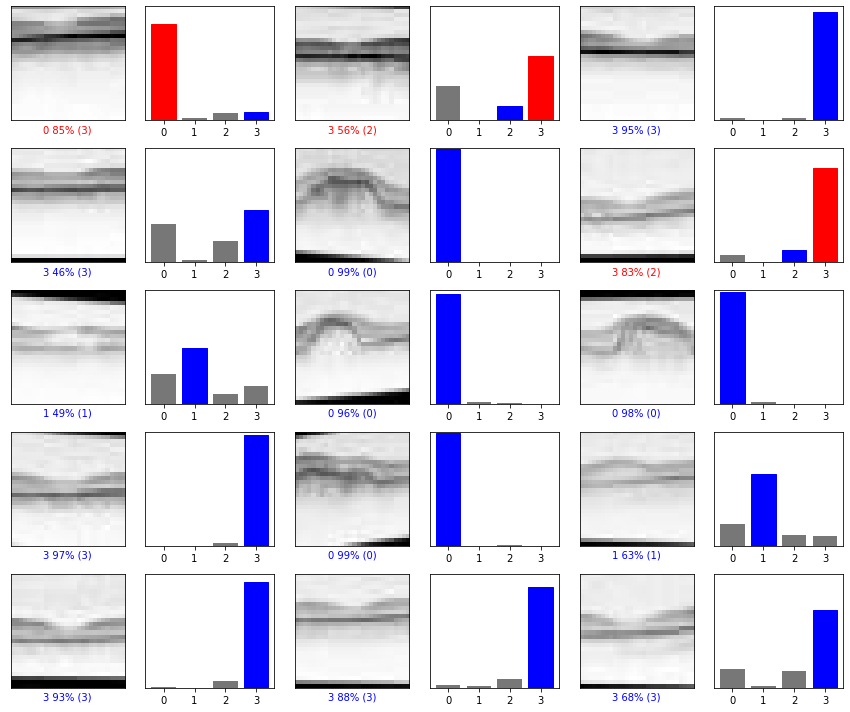

In [48]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()